# Salary Predictions Based on Job Descriptions

# DEFINE

### ---- Problem Definition ----

Considering the uncertainties and competitiveness in the job market, as job seekers, knowing how much employees are willing to pay for certain jobs would prove to be very beneficial to the job seekers. On the other hand, employers could benefit for this by having reference for the salaries in their company. It is beneficial for them both to know how factors such as educational qualifications, years of experience, job industry, etc affect their salary.

Thus, can we develop a model where salaries can be predicted based on the available features? If so, how accurate can the model get?Are the features available good enough for a predictive model?


### Dataset

In order to solve the problem we defined above, a Dataset of salary and jobs is provided.

The data is split into 2 CSV files to train the model, one with the features and one with the target variable. The features are the descriptions of the jobs of a group of companies, with the following columns:
- jobId: The ID of the job.
- companyId: The ID of the company.
- jobType: The description of the job/position of the job within the company (Junior, Senior, etc).
- degree: The degree of the employee.
- major: The university or college field of specialization of the employee.
- industry: The field to which the company belongs.
- yearsExperience: The years of experience of the employee.
- milesFromMetropolis: The distance in miles, from the employee's house to the metropolis.

Target Variable
- salary: Salary for the job.

In [553]:
#import libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#etc

#author info 
__author__ = "Mahdiazhari Austian"
__email__ = "mahdi.austian@gmail.com"

## DISCOVER

In this step, we will examine the data further and fix any sort of missing values or inconsistencies.

### Loading the data 

In [554]:
#load the data into a Pandas dataframe
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

### Examining the Data

In [555]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [556]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


There are several categorical features and 2 numerical features.

### Examining the Categorical Features

#### Degree

In [557]:
train_feature_df['degree'].unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

Some people did not have any sort of degree.

#### Job Type

In [558]:
train_feature_df['jobType'].unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

These values represent the job position experience. Interestingly, there's also a value for the Janitor position.

#### Major

In [559]:
train_feature_df['major'].unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

There are some employees with No major at all (perhaps they did not go to college/did not have any degrees).

#### Examining the Target variables

It seems that these employees/job ids are associated with a certain salary.

In [560]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### Check for Duplicates

In [561]:
train_feature_df.duplicated().sum()

0

In [562]:
test_feature_df.duplicated().sum()

0

In [563]:
train_target_df.duplicated().sum()

0

### Separating Numerical and Categorical Variables

Since we know that there are only 2 numerical columns, we can seperate these into numerical and categorical

In [564]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [565]:
numeric_cols=['yearsExperience', 'milesFromMetropolis']

In [566]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### Summarize Numerical and Categorical Features

#### Numerical Features

In [567]:
train_feature_df.describe(include = [np.number]) #Numerical

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


#### Categorical Features

In [568]:
train_feature_df.describe(include = ['O']) #Categorical

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684934085,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


It has been a hassle to juggle between these two dataframes. Hence, during this step, the target (salary) will be combined with the features dataframe.

In [569]:
# Merge the features and salaries on jobId to simplify analysis
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

#### Checking NA values of the variables

In [570]:
#Function to check the NA values
def check_NA(df):
    df_data_null = df.isnull().sum().reset_index(name='count')
    df_data_null['percentage'] = df_data_null['count']/df.shape[0]*100
    print('Total number of null values: ', df_data_null['count'].sum())
    return df_data_null

In [571]:
check_na_df = check_NA(train_df)
check_na_df

Total number of null values:  0


,index,count,percentage
0,jobId,0,0.0
1,companyId,0,0.0
2,jobType,0,0.0
3,degree,0,0.0
4,major,0,0.0
5,industry,0,0.0
6,yearsExperience,0,0.0
7,milesFromMetropolis,0,0.0
8,salary,0,0.0


### Visualize Target Variable (Salary)

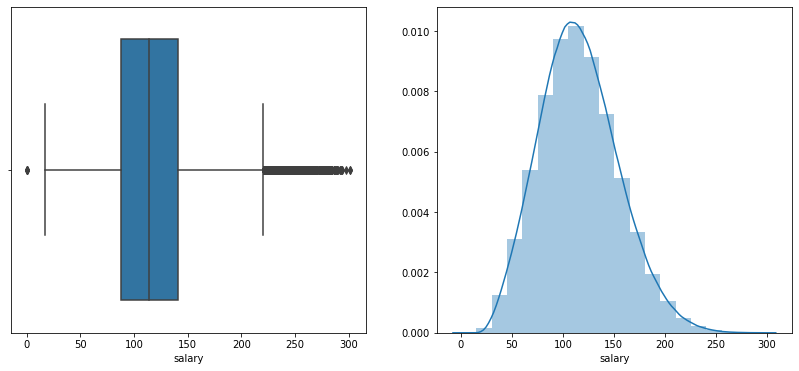

In [572]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

The salary variable seems to follow a normal distribution, but the boxplot suggests that outliers are present.

### Idenfifying Potential Outliers with IQR

In [573]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('Upper and lower bounds for the suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
Upper and lower bounds for the suspected outliers are 220.5 and 8.5.


### Examining potential Outliers

In [574]:
#check potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


The outliers here show that they are not voluntary roles but these employees were still paid 0. Therefore, this must be some sort of measurement error and should be removed from the training set.

In [575]:
#check potential outlier above the upper bound
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [576]:
train_df.loc[train_df.salary > 222.5, 'industry'].unique()

array(['OIL', 'HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'SERVICE'],
      dtype=object)

It can be observed that these jobs are in high value industries. Perhaps, the job type (job positions) should be checked as well.

In [577]:
#check potential outliers above upper bound based on job position
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

Some juniors have very high salary. Let's investigate.

In [578]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


These 16 juniors are from high value industries but with 20+ years of experience. Perhaps they are transitioning into new careers. We can determine that these values are also legitimate and not remove them from the training set.

### Outlier Removal

As found above, the outliers to be removed are the 7 employees with 0 salaries.

In [579]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

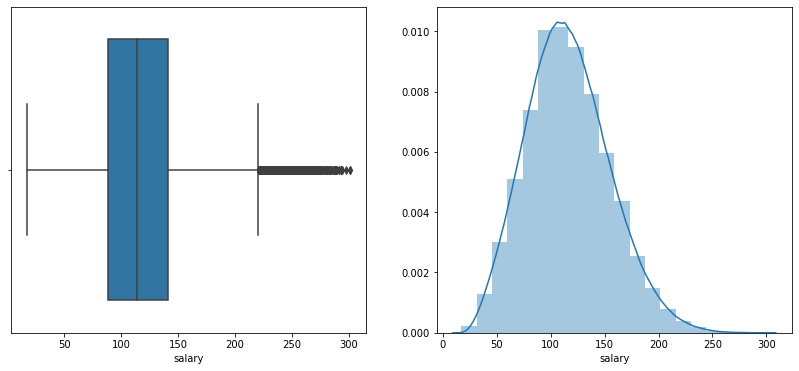

In [580]:
# Examine the Plot after Outlier Removal
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

As reasoned above, the values with salaries of 0 have been removed.

### ---- Exploratory Data Analysis (EDA) ----

In [605]:
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


The mean of salaries is 116K USD per year. 

In [581]:
# Function to plot side-by-side the feature and their counts on the left graph and the feature and salary on the right graph
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

#### Company ID

In [582]:
train_df['companyId'].describe()

count     999995
unique        63
top       COMP39
freq       16193
Name: companyId, dtype: object

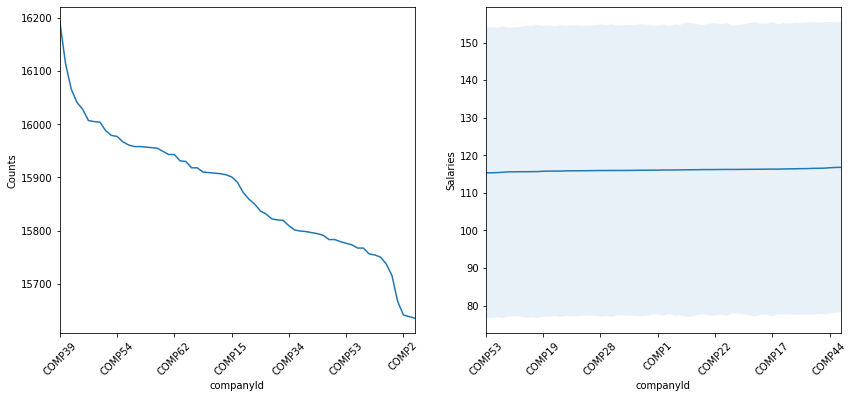

In [583]:
plot_feature(train_df, 'companyId')

It can be inferred that salary is weakly correlated with the different companies.

#### Job Type

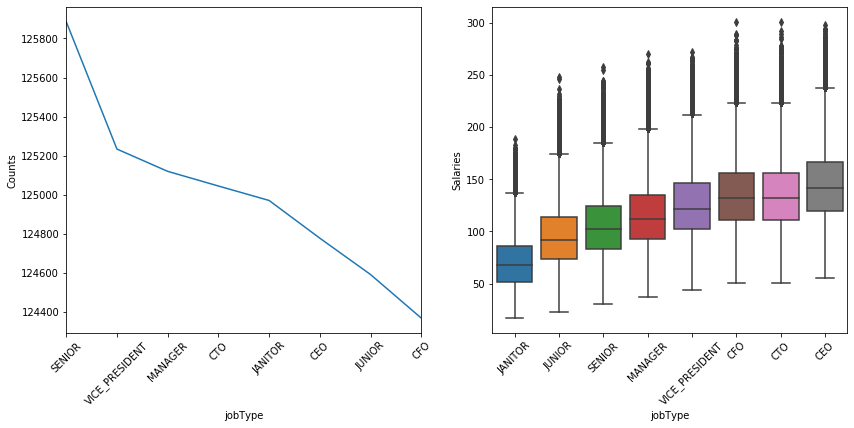

In [584]:
plot_feature(train_df, 'jobType')

There is a positive correlation between the job type (job position) and salary.

#### Degree

In [585]:
train_df['degree'].describe()

count          999995
unique              5
top       HIGH_SCHOOL
freq           236975
Name: degree, dtype: object

Most employees have a high school degree

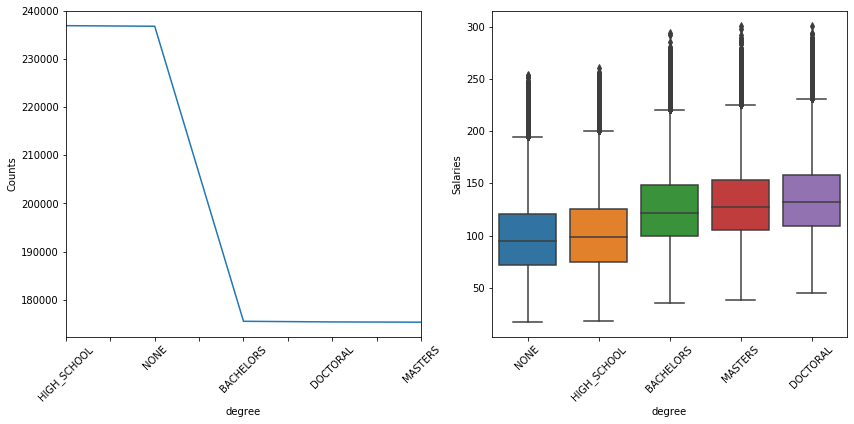

In [586]:
plot_feature(train_df, 'degree')

Higher/More advanced degrees are associated with higher salaries

#### Major

In [587]:
train_df['major'].describe()

count     999995
unique         9
top         NONE
freq      532353
Name: major, dtype: object

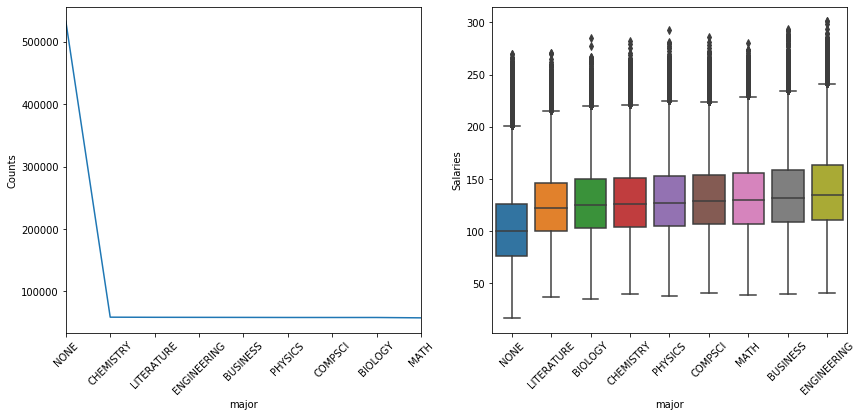

In [588]:
plot_feature(train_df, 'major')

Employees with a major in Math, Business, and Engineering generally have higher salaries.

#### Industry

In [589]:
train_df['industry'].describe()

count     999995
unique         7
top          WEB
freq      143205
Name: industry, dtype: object

Most employees are from the Web industry.

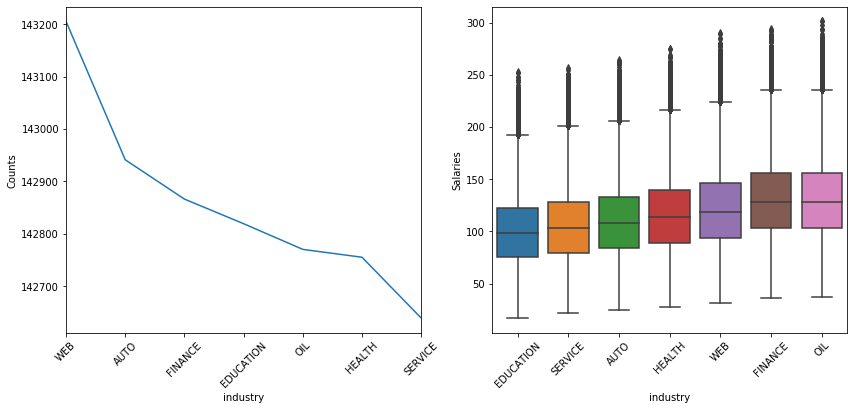

In [590]:
plot_feature(train_df, 'industry')

The Web, Finance, and Oil Industries pay better in general.

#### Years of Experience

In [591]:
train_df['yearsExperience'].describe()

count    999995.000000
mean         11.992407
std           7.212390
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          24.000000
Name: yearsExperience, dtype: float64

Employees have a mean working experience of around 12 years, with a maximum working experience of 24 years.

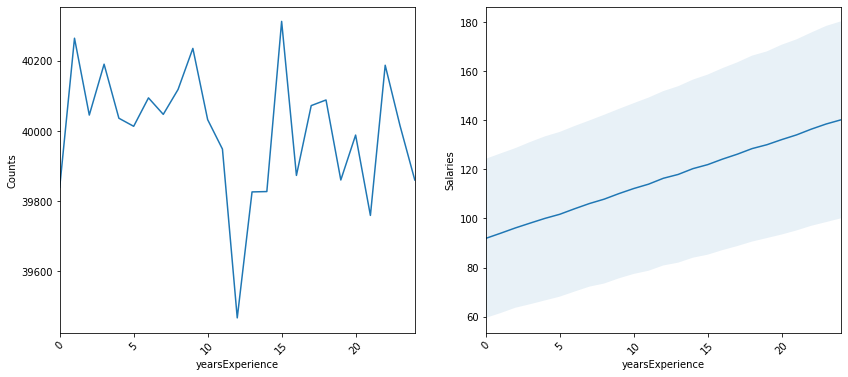

In [592]:
plot_feature(train_df, 'yearsExperience')

There is a clear correlation between years of experience and salary

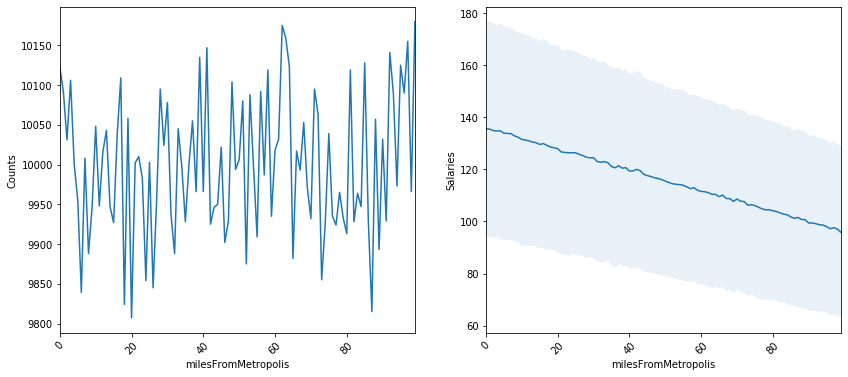

In [593]:
plot_feature(train_df, 'milesFromMetropolis')

Salaries get smaller the closer the employee is to the metropolis.

#### Check the correlations between features and the target variable

In [594]:
# Correlations between selected features and response
train_df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


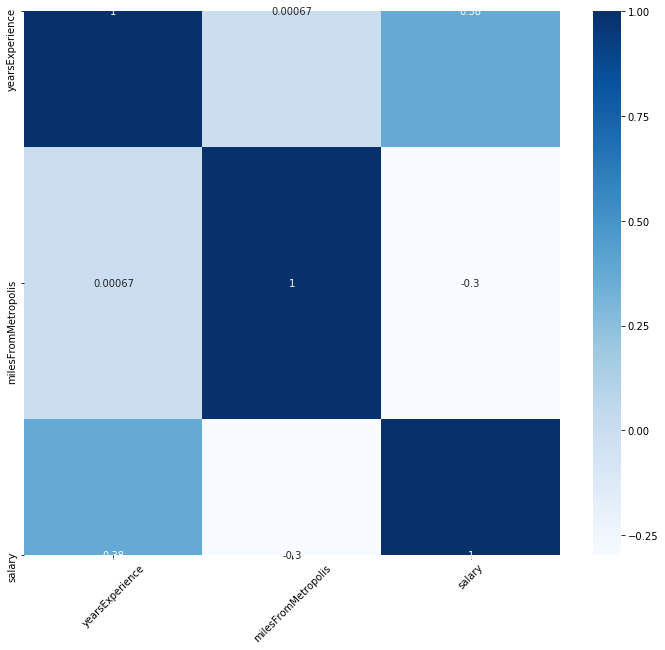

In [595]:
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

We can observe that there's a small positive correlation between years of experience and salary. There is no correlation between numerical features.

### ---- 5 Establish a baseline ----

In [597]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [598]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [599]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [600]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [601]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [602]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [603]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [604]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data